In [10]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math
import copy

In [11]:
var = np.poly1d([1, 0, 1])
print(var)

   2
1 x + 1


In [12]:
derivative = var.deriv()
print(derivative)

 
2 x


In [13]:
print(derivative(5))

10


Task 1

In [14]:
x = Symbol('x')
# y = (abs(x))**2
y_list = [
    # abs(x)**2,
    x**2+1,
    # sin(x)/x,
    # abs(x),
    
]

for y in y_list:
    fdiff = diff(y, x)
    # print(fdiff)
    f = lambdify(x, fdiff)
    x0 = 0
    print(f"{fdiff}({x0}) = {f(x0)}")

2*x(0) = 0


Task 2

In [15]:
x = Symbol('x')
y = x ** x
fdiff = diff(y, x)
print(fdiff)
x0 = math.e
print(x0)
f = lambdify(x, fdiff)
print(f(x0))

x**x*(log(x) + 1)
2.718281828459045
30.308524482958518


Task 3

In [16]:
x = Symbol('x')
y = tan(x) * ln(cos(x**2) + 1)
# y = x**2 + 1
# yprime = y.diff(x)
yprime = diff(y, x)
print(yprime)
f1 = lambdify(x, yprime)
print(f1(0))

-2*x*sin(x**2)*tan(x)/(cos(x**2) + 1) + (tan(x)**2 + 1)*log(cos(x**2) + 1)
0.6931471805599453


Task 4

In [17]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        ff = (func(x + epsilon) - func(x)) / epsilon
        return ff
        
    return deriv_func

True


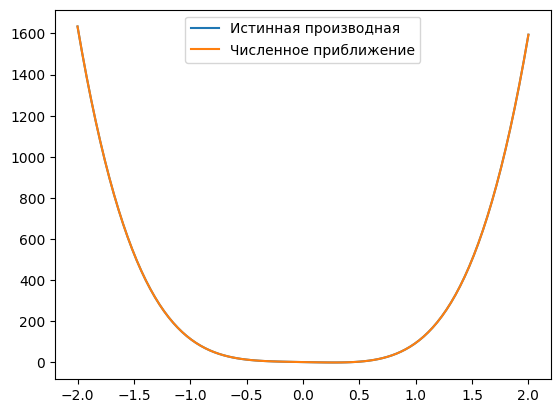

In [18]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    # plt.plot(grid, primed_poly(grid), label="Истинная производная")
    # plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    # plt.legend()
    # plt.show()

plt.plot(grid, primed_poly(grid), label="Истинная производная")
plt.plot(grid, approx_deriv(grid), label="Численное приближение")
plt.legend()

print(str(right_flag))

Task 5

In [19]:
def plot_convergence_1d(func, x_steps, y_steps, ax, grid=None, title=""):
    """
    Функция отрисовки шагов градиентного спуска. 
    Не меняйте её код без необходимости! 
    :param func: функция, которая минимизируется градиентным спуском
    :param x_steps: np.array(float) — шаги алгоритма по оси Ox
    :param y_steps: np.array(float) — шаги алгоритма по оси Оу
    :param ax: холст для отрисовки графика
    :param grid: np.array(float) — точки отрисовки функции func
    :param title: str — заголовок графика
    """
    ax.set_title(title, fontsize=16, fontweight="bold")

    if grid is None:
        grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)

    fgrid = [func(item) for item in grid]
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)

    arrow_kwargs = dict(linestyle="--", color="grey", alpha=0.4)
    for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i], 
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i], 
                **arrow_kwargs
            )

    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c=color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска. 
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)


def test_convergence_1d(grad_descent, test_cases, tol=1e-2, axes=None, grid=None):
    """
    Функция для проверки корректности вашего решения в одномерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция (обязательно)
        - "deriv" — её производная (обязательно)
        - "start" — начальная точка start (м.б. None) (опционально) 
        - "low", "high" — диапазон для выбора начальной точки (опционально)
        - "answer" — ответ (обязательно)
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :param grid: np.array(float), точки на оси Ох для отрисовки тестов
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = copy.deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent(*test_input.values(), callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input["func"], x_steps, y_steps, 
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle="--", c="red",
                        label=f"true answer = {answer}")
            ax.axvline(res_point, 0, linestyle="--", c="xkcd:tangerine", 
                        label=f"estimate = {np.round(res_point, 3)}")
            ax.legend(fontsize=16)
        # Проверяем, что найдення точка достаточно близко к истинной
        if abs(answer - res_point) > tol or np.isnan(res_point):
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

In [50]:
def grad_descent_v1(f, deriv, x0=None, lr=0.05, iters=150, callback=None):
    """ 
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param x0: float — начальная точка
    :param lr: float — learning rate
    :param iters: int — количество итераций
    :param callback: callable — функция логирования
    """

    if x0 is None:
        # Если точка не дана, сгенерируем случайную
        # из стандартного нормального распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        # np.random.seed(179)
        x0 = np.random.uniform()

    x = x0

    callback(x, f(x))  # не забывайте логировать

    for i in range(iters):
        x = x - lr * deriv(x)
        callback(x, f(x))
        if round(deriv(x), 2) == 0:
            print('Found:', x, deriv(x))
            break
        else:
            print(x)

    return x

1.8
1.62
1.4580000000000002
1.3122000000000003
1.1809800000000001
1.062882
0.9565938
0.86093442
0.774840978
0.6973568802
0.62762119218
0.564859072962
0.5083731656658
0.45753584909922
0.41178226418929803
0.3706040377703682
0.33354363399333137
0.30018927059399825
0.2701703435345984
0.24315330918113856
0.2188379782630247
0.19695418043672222
0.17725876239305
0.159532886153745
0.1435795975383705
0.12922163778453344
0.1162994740060801
0.10466952660547209
0.09420257394492487
0.08478231655043239
0.07630408489538915
0.06867367640585023
0.06180630876526521
0.05562567788873869
0.05006311009986482
0.045056799089878335
0.0405511191808905
0.03649600726280145
0.03284640653652131
0.029561765882869177
0.02660558929458226
0.023945030365124034
0.02155052732861163
0.01939547459575047
0.01745592713617542
0.01571033442255788
0.014139300980302092
0.012725370882271882
0.011452833794044694
0.010307550414640224
0.009276795373176201
0.008349115835858581
0.007514204252272723
0.006762783827045451
0.006086505444340

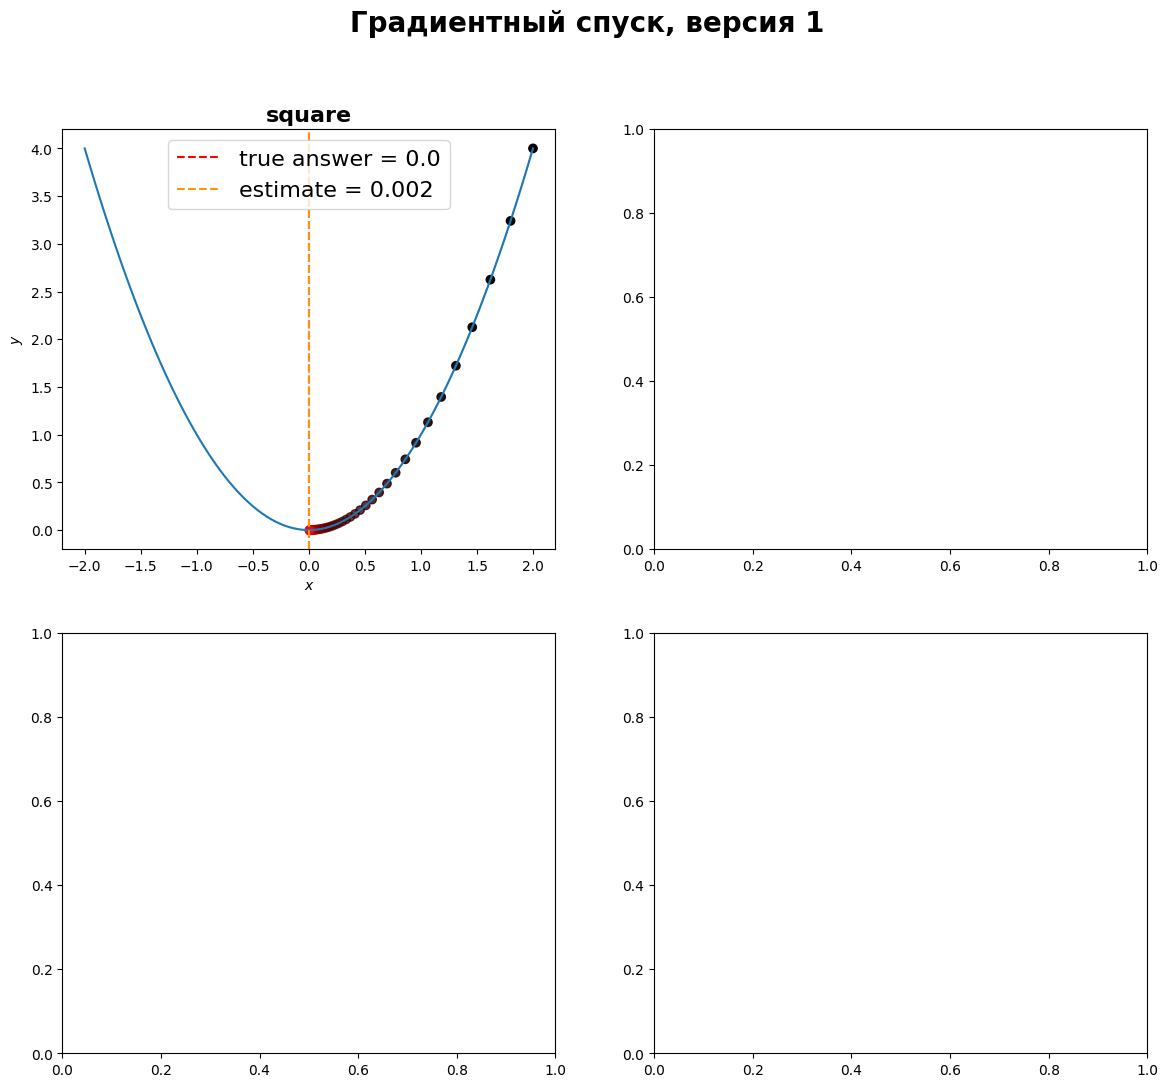

In [51]:
test_cases = {
    "square": {
        "func" : lambda x: x * x, 
        "deriv" : lambda x: 2 * x, 
        "start" : 2, 
        "answer" : 0.0
    },
    # "module": {
    #     "func" : lambda x: abs(x),  
    #     "deriv" : lambda x: 1 if x > 0 else -1,
    #     "start" : 2, 
    #     "answer" : 0.0
    # },
    # "third_power": {
    #     "func" : lambda x: abs((x - 1)**3),
    #     "deriv" : lambda x: 3 * (x - 1)**2 * np.sign(x-1),
    #     "start" : -1, 
    #     "answer" : 1.0
    # },
    # "ln_x2_1": {
    #     "func" : lambda x: np.log((x + 1)**2 + 1),  
    #     "deriv" : lambda x: 2 * (x + 1) / (x**2 +1), 
    #     "start" : 1, 
    #     "answer" : -1.0
    # }
}



tol = 1e-2  # желаемая точность 
fig, axes = plt.subplots(2,2, figsize=(14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight="bold", fontsize=20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol, 
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)